In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20429.000000,20640.000000,20636.000000,20640.000000,20638.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.899848,1425.476744,499.575111,3.870671,206852.449898
std,2.003532,2.135952,12.585558,2181.615252,421.419669,1132.462122,382.357541,1.899822,115400.700475
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264775.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


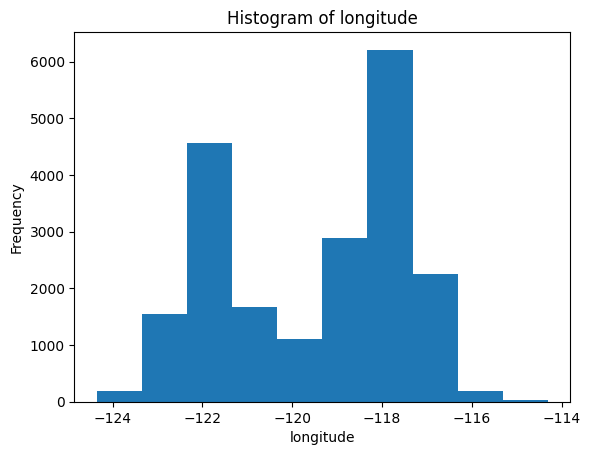

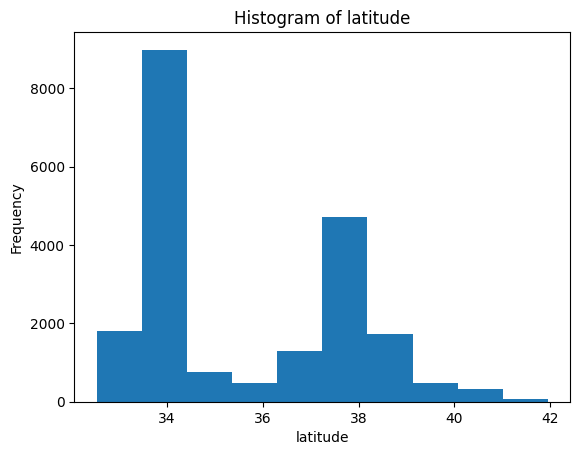

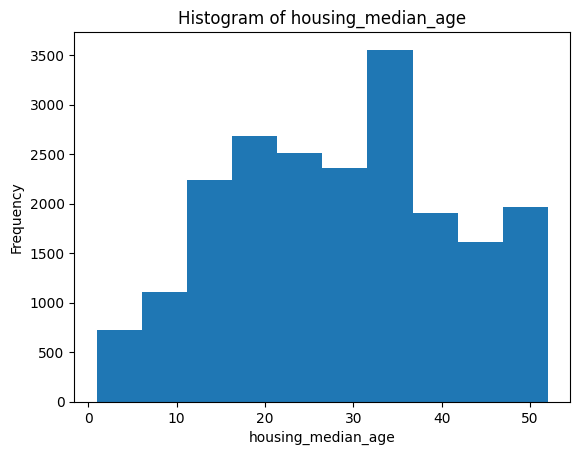

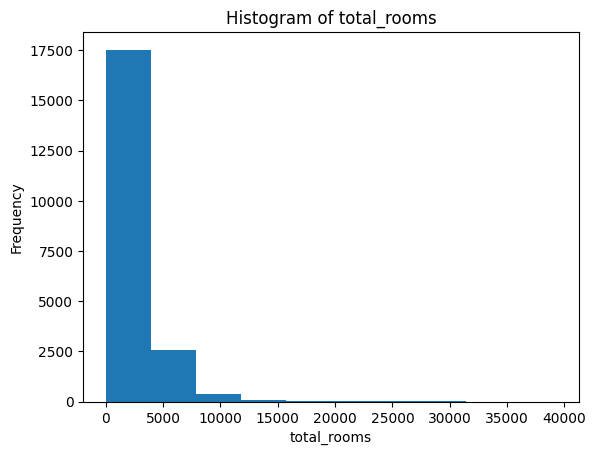

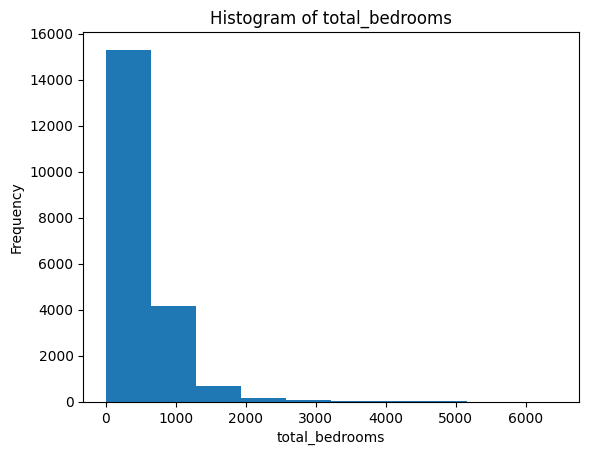

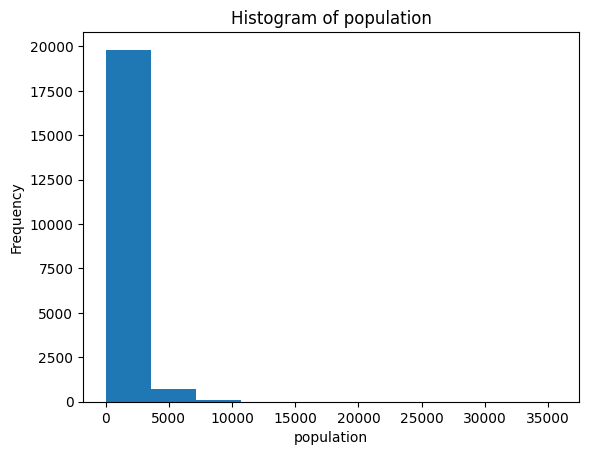

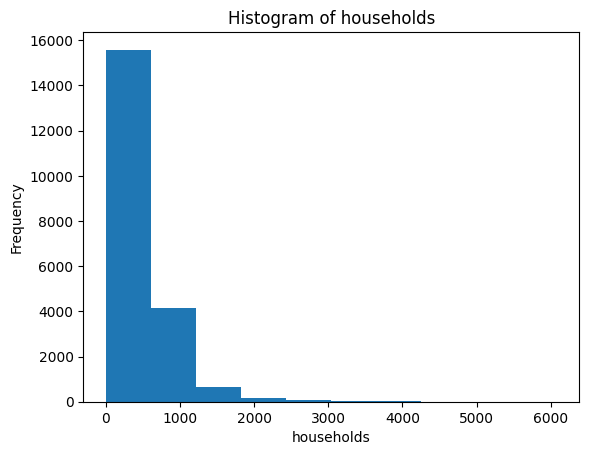

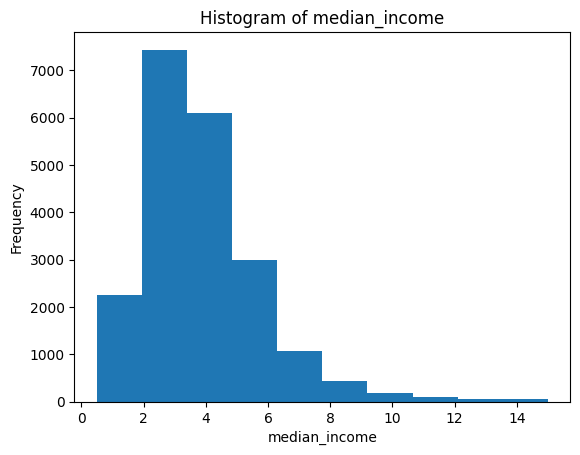

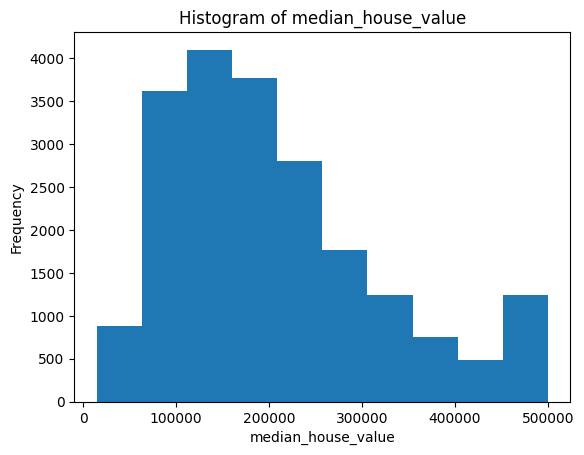

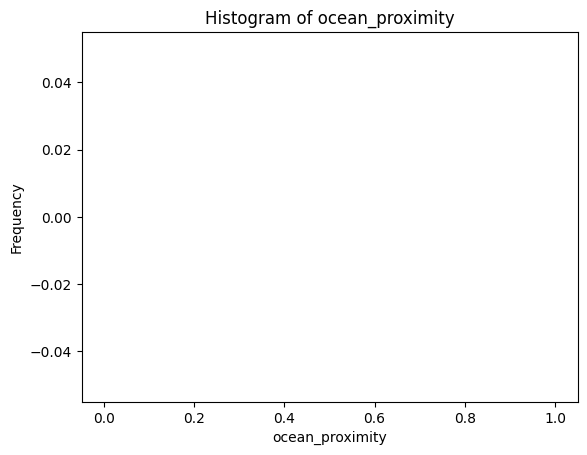

In [ ]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    plt.figure()
    data[column].plot(kind='hist', bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

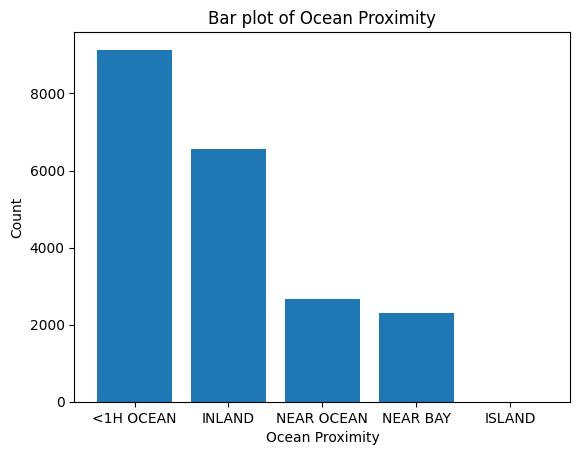

In [ ]:
plt.figure()

ocean_proximity_counts = data['ocean_proximity'].value_counts()

plt.bar(ocean_proximity_counts.index, ocean_proximity_counts.values)

plt.title('Bar plot of Ocean Proximity')

plt.xlabel('Ocean Proximity')

plt.ylabel('Count')

plt.show()

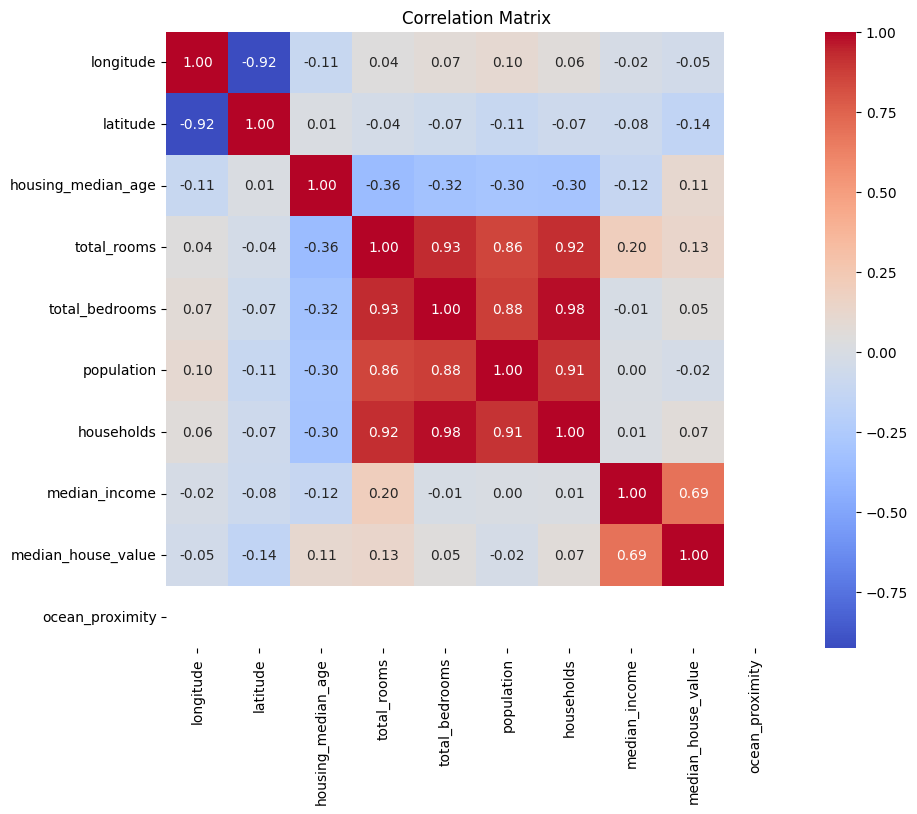

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

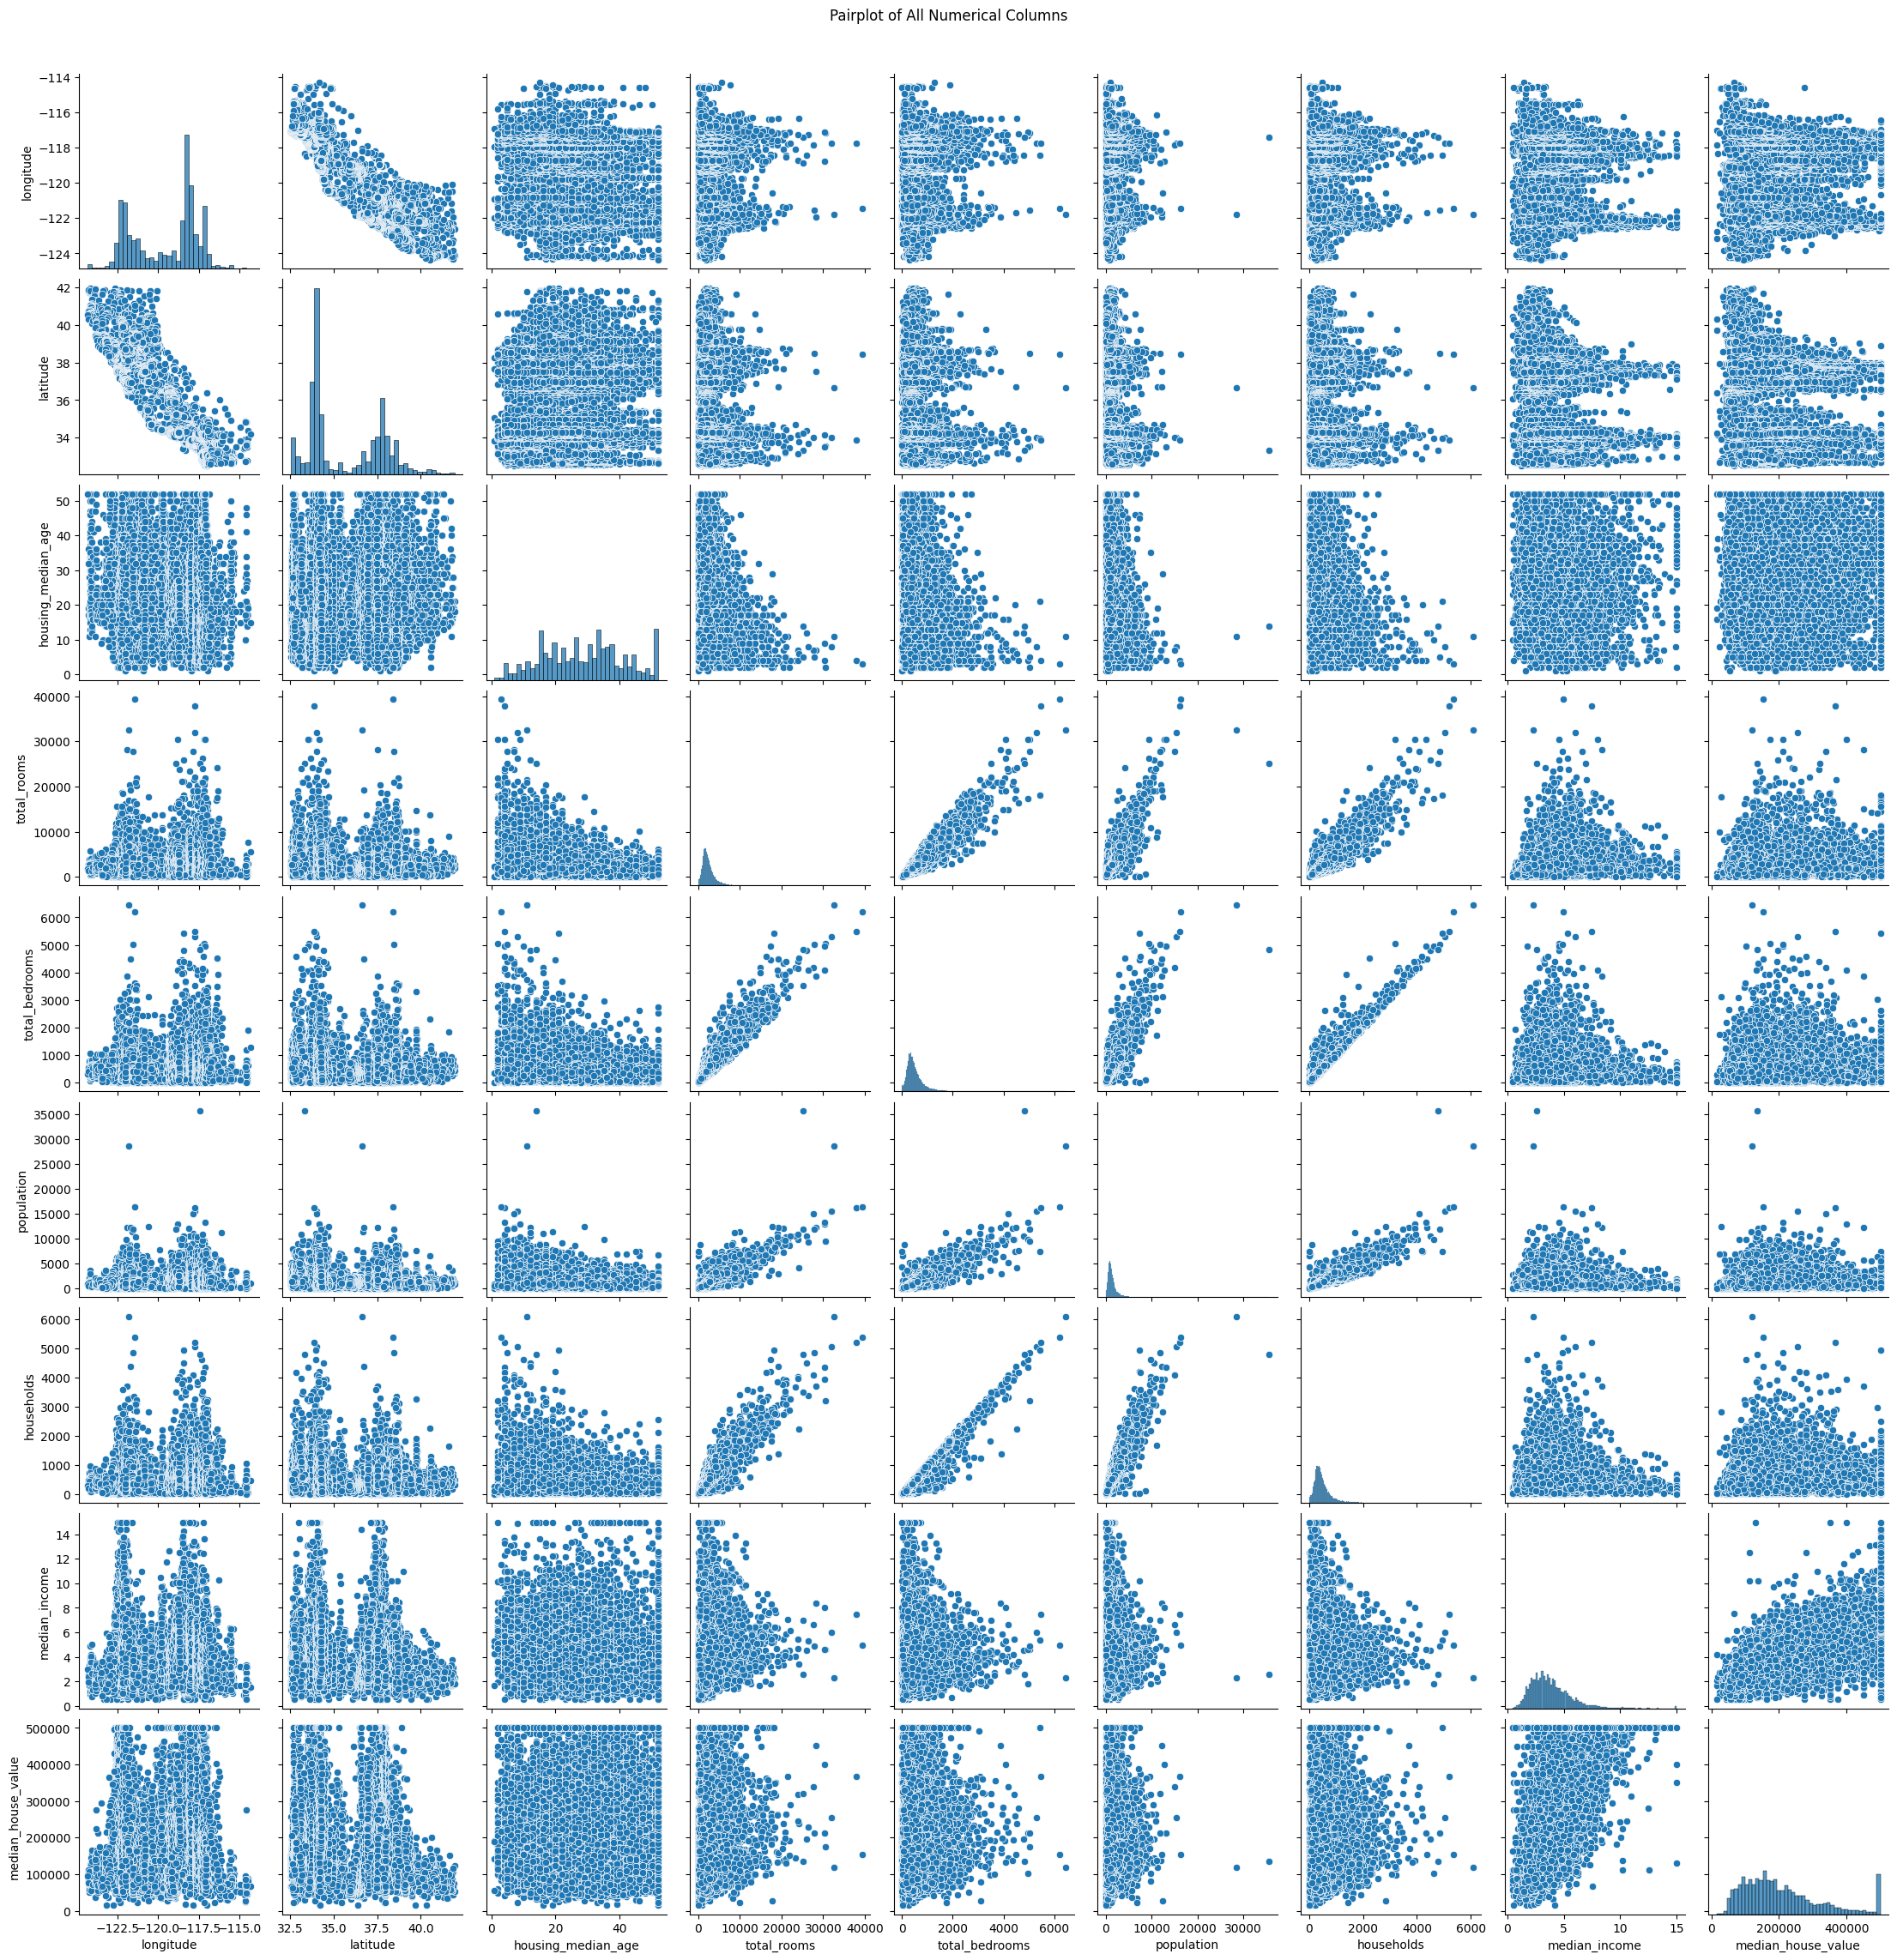

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create a pairplot for all numerical columns
sns.pairplot(data[numerical_columns])

plt.suptitle('Pairplot of All Numerical Columns', y=1.02)  # Adjust title position

plt.show()

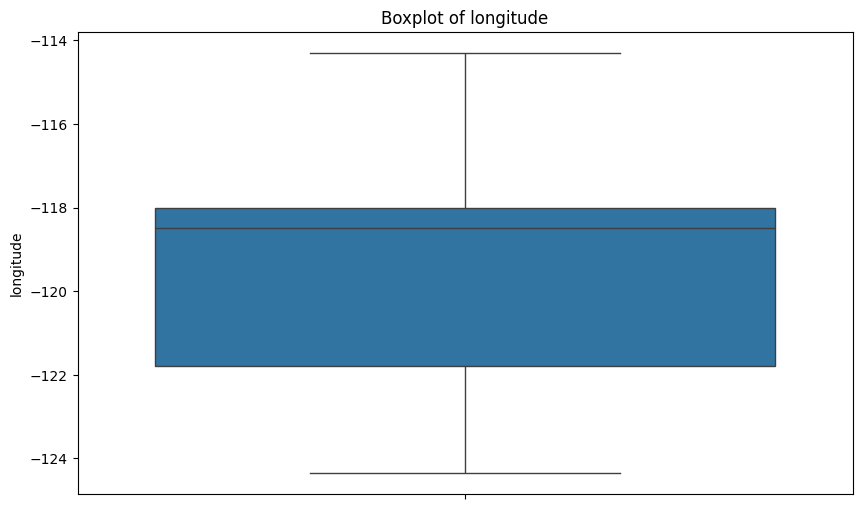

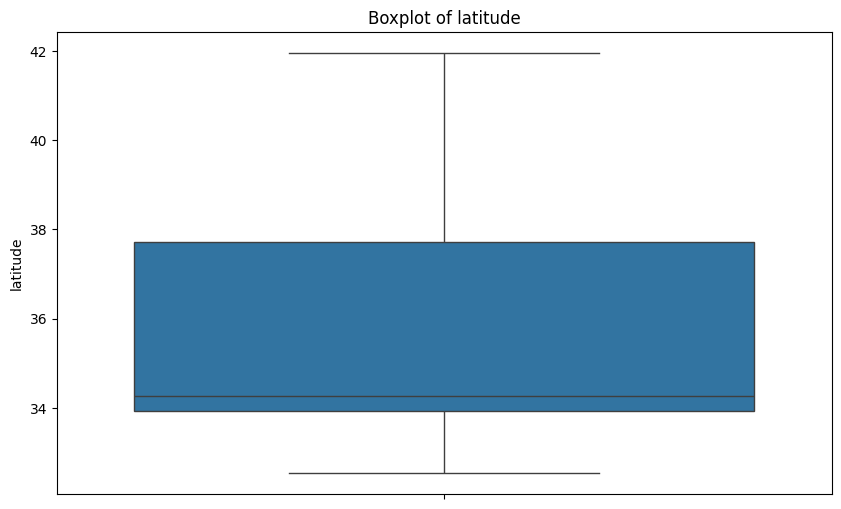

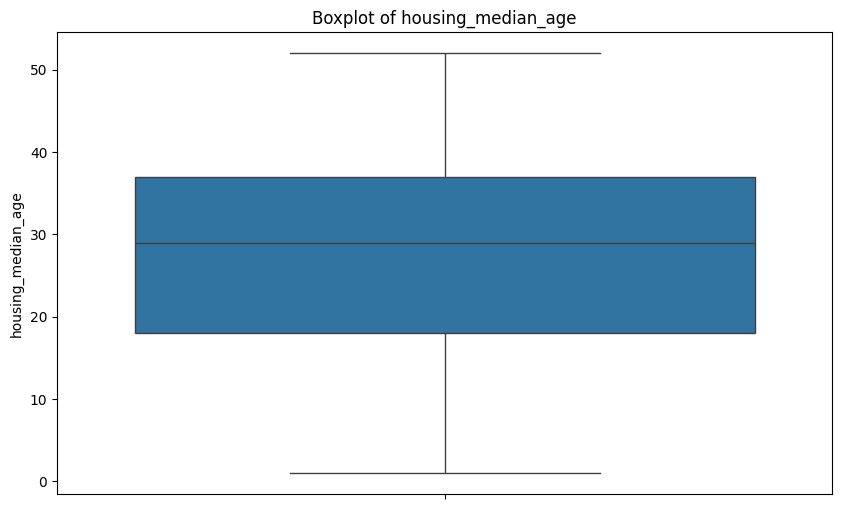

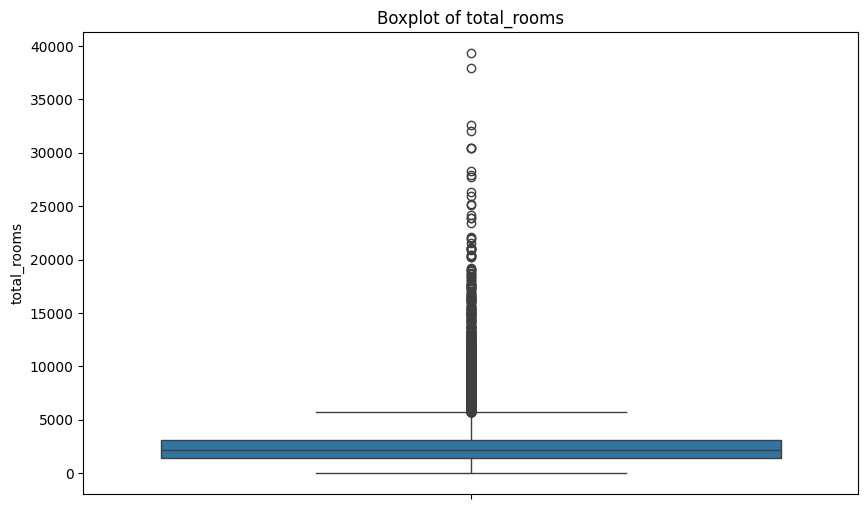

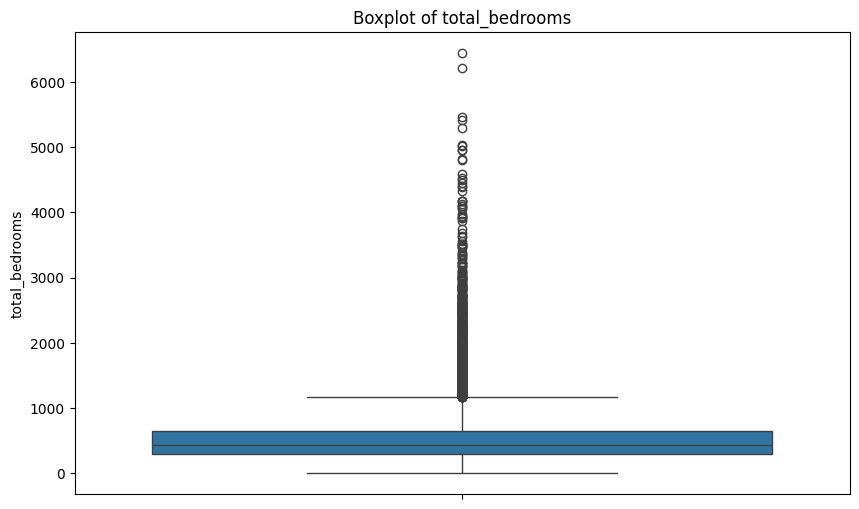

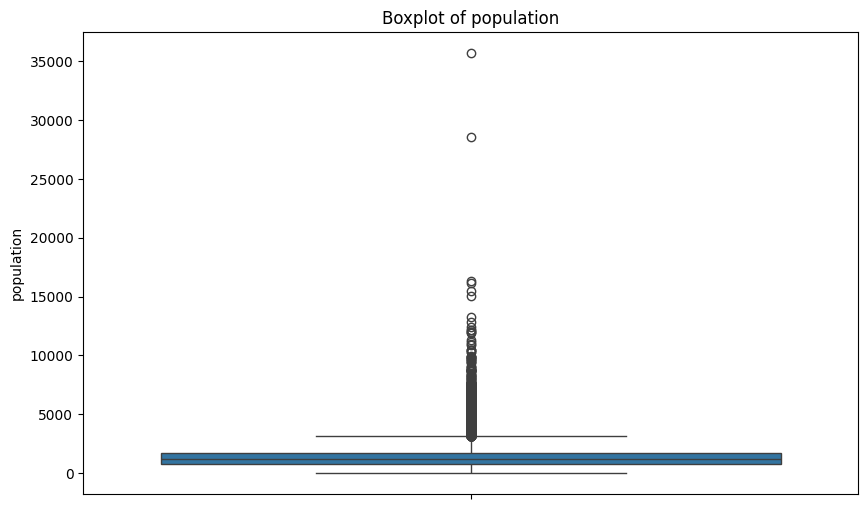

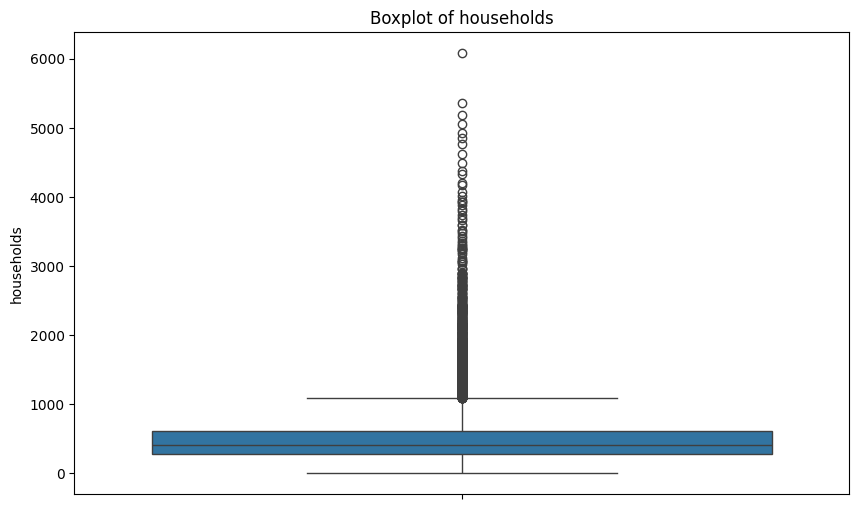

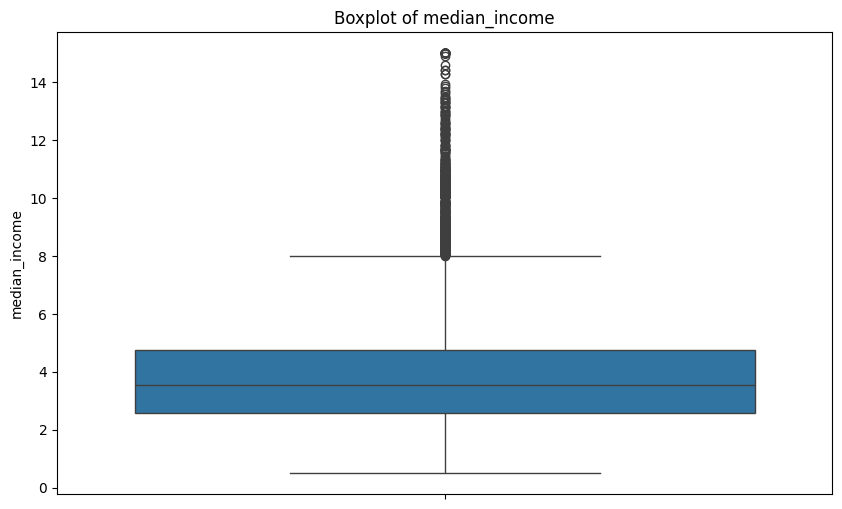

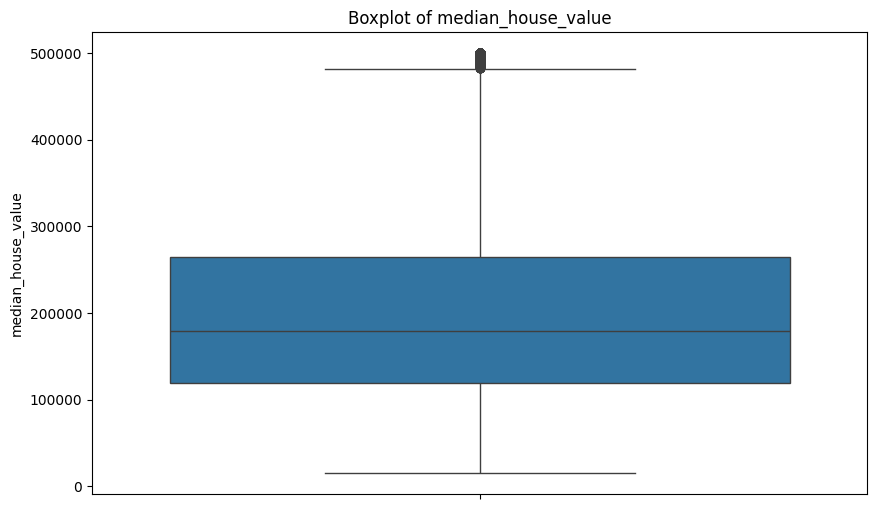

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

In [ ]:
#PreProcessing

In [ ]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
null_values = data.isnull().sum()
print(null_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64


In [ ]:
columns_to_fill = ['total_bedrooms', 'households', 'median_house_value', 'ocean_proximity']
for column in columns_to_fill:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,306.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [ ]:
#label encodening

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['ocean_proximity']= label_encoder.fit_transform(data['ocean_proximity'])

print(data['ocean_proximity']);

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled data back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the resulting datasets
print("X_train_scaled:\n", X_train_scaled)
print("X_test_scaled:\n", X_test_scaled)

X_train_scaled:
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       0.729084  0.017021            0.627451     0.079455        0.097145   
1       0.616534  0.129787            0.941176     0.085966        0.121974   
2       0.385458  0.224468            0.058824     0.048197        0.051210   
3       0.721116  0.014894            0.686275     0.036090        0.056797   
4       0.453187  0.450000            0.823529     0.060532        0.066729   
...          ...       ...                 ...          ...             ...   
16507   0.636454  0.130851            0.666667     0.033776        0.031037   
16508   0.689243  0.156383            0.627451     0.078386        0.088299   
16509   0.594622  0.157447            0.686275     0.053385        0.088144   
16510   0.238048  0.535106            0.274510     0.090874        0.092489   
16511   0.192231  0.555319            1.000000     0.107432        0.203911   

       population  households  med

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.6108449716299261
